In [ ]:
## OSR test for case 1a - m3/h

>   ### model plotting at test set


>>#### Test RMSE: 0.146
>>#### Test MAPE: 5.745
>>#### Test SMAPE: 5.925
>>#### Correlation: 0.872
>>#### R-squared: 0.761

>   #### target feature:            MW (thermic) 
>   #### exogenous feature:         m3/h
>   ### statistical esimator:       SARIMAX - Seasonal Auto-Regressive Integrated Moving Average
   


> RENergetic Project: fitting a forcasting estimator to predict MW over time and use of m3/h as exo feature

>This model is based on model proptotyping run in Python 3.8 for the hyperparameters order and seasonal order

> Dataframe from: XXX building complex 
>   ### time window covered: 15-Aug-2020 -> 09 Nov 2020

>Other buildings in OXXX and dataframes available - contact DR D. Baranzini)

>> Coding by Dr Daniele Baranzini



In [1]:
# method to check working directory
import os
CURR_DIR = os.getcwd()
print(CURR_DIR)

C:\Users\GLP\anaconda3\envs\SARIMAX_py38_test_auto_arima


In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
#from scipy.stats import norm
import matplotlib.pyplot as plt
#from datetime import datetime                             # maybe necessary for future actions on dates and indexing
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX     # toy-model for SARIMAX estimator
#from random import random
import openpyxl

In [4]:
# read data and encode timestamp feature as index and encode it then as _DatetimeIndex_to allocate proper _freq_
df_base = pd.read_excel('Summer_Period_Dibit2_V04_REPLICA.xlsx')
df_base.index = df_base['timestamp']
df_base.index = pd.DatetimeIndex(df_base.index, freq='H')   #note the use of: .values (test dropping it from _df_base.index_)

# df_base['timestamp'].index = pd.DatetimeIndex(df_base['timestamp'].index, freq='H')   ## this can streamline line 4 above...but in SARMIMAX it does not read _freq_and gives warning)

#df_base.info()

ts1 = df_base[['m3_h_orig_orig', 'MW']]          #timestamp column is dropped as it is doubled with index 

ts1_train = ts1.loc[:'2020-11-06']
ts1_test = ts1.loc['2020-11-07':]

endog_train = ts1_train['MW'][:'2020-11-06']
exog_train = ts1_train['m3_h_orig_orig'][:'2020-11-06']
#endog_train.shape, exog_train.shape

endog_train = pd.DataFrame(endog_train)  #encode a 1D array into a pd.DataFrame to use in .auto_arima
exog_train = pd.DataFrame(exog_train)    #encode a 1D array into a pd.DataFrame to use in .auto_arima

endog_test = df_base['MW']['2020-11-07':]
exog_test = df_base['m3_h_orig_orig']['2020-11-07':]
# endog_test.shape, exog_test.shape

endog_test = pd.DataFrame(endog_test)  #encode a 1D array into a pd.DataFrame to use in .auto_arima
exog_test = pd.DataFrame(exog_test)    #encode a 1D array into a pd.DataFrame to use in .auto_arima


### (pdq) (PDQ)m stepwise search with pmdarima API

In [5]:
# pip install pmdarima      ...reinstall module if needed

In [6]:
import pmdarima
print(pmdarima.__version__)

1.8.2


In [7]:
# import auto_arima function (from pmdarima.arima.auto_arima) to select stepwise best SARIMAX parmaters
from pmdarima.arima import auto_arima

In [28]:
model1 = auto_arima(endog_train, exogenous=exog_train, trace=True, seasonal=True, m=24)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-5323.547, Time=21.73 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-4695.869, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-4998.583, Time=5.90 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-5178.331, Time=9.36 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-4697.867, Time=0.78 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-5330.252, Time=18.84 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=-5300.751, Time=2.30 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=-5351.315, Time=70.49 sec
 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=-5345.536, Time=76.11 sec
 ARIMA(1,1,2)(0,0,2)[24] intercept   : AIC=-5274.424, Time=64.65 sec
 ARIMA(2,1,1)(0,0,2)[24] intercept   : AIC=-5295.364, Time=65.49 sec
 ARIMA(3,1,2)(0,0,2)[24] intercept   : AIC=-5353.426, Time=73.22 sec
 ARIMA(3,1,2)(0,0,1)[24] intercept   : AIC=-5340.551, Time=21.96 sec
 ARIMA(3,1,2)(1,0,2)[24] intercept   : AIC=-5323.668, Time=82.78 

MemoryError: Unable to allocate 44.9 MiB for an array with shape (2016, 54, 54) and data type float64

In [9]:
# hyperparmaters SARIMAX before memory error:  ARIMA(4,1,2)(2,0,1)[24] no intercept   : AIC=-5371.297, Time=95.35 sec
# use such model for SARIMAX below

In [30]:
#model1.summary()

In [19]:
#Out-of-Sample fitting - model1 - from .auto_arima [ARIMA(4,1,2)(2,0,1)[24] : AIC=-5371.297, Time=95.35 sec]
# fit the complete model
model = SARIMAX(endog_train, exog_train, trend=None, order=(4,1,2), seasonal_order=(2,0,1,24)) # no intercept??
fit_res = model.fit(disp=False)              # .fit(disp=False, maxiter=250) not used
print(fit_res.summary())

C:\Users\GLP\anaconda3\envs\SARIMAX_py38_test_auto_arima\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                   MW   No. Observations:                 2016
Model:             SARIMAX(4, 1, 2)x(2, 0, [1], 24)   Log Likelihood                2696.648
Date:                              Fri, 21 May 2021   AIC                          -5371.297
Time:                                      14:08:49   BIC                          -5309.604
Sample:                                  08-15-2020   HQIC                         -5348.653
                                       - 11-06-2020                                         
Covariance Type:                                opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
m3_h_orig_orig     0.0136      0.000    133.207      0.000       0.013       0.014
ar.L1  

### TRAIN SET
#### performance model1 (forecast MW with exogenous m3/h instant flow hot water)

#### In-sample performance

In [21]:
# In-sample forecast (baseline approach on train set used as backtesting)
yhat = fit_res.predict()        # example of Out-of-sample forecast with exo run over the In-sample training set 
yhat = pd.DataFrame(yhat)
yhat                                                 # predict() can do In- or Out-of-sample forecast

,predicted_mean
timestamp,
2020-08-15 00:00:00,0.811788
2020-08-15 01:00:00,0.940000
2020-08-15 02:00:00,1.005160
2020-08-15 03:00:00,0.926245
2020-08-15 04:00:00,1.028107
...,...
2020-11-06 19:00:00,1.892951
2020-11-06 20:00:00,1.793420
2020-11-06 21:00:00,1.870911


In [22]:
ts1_train['Forecast_SARIMAX']=yhat                                                # appending forecast values to ts1 dataframe
ts1_train

<ipython-input-22-d73c4ed2b79a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts1_train['Forecast_SARIMAX']=yhat                                                # appending forecast values to ts1 dataframe


,m3_h_orig_orig,MW,Forecast_SARIMAX
timestamp,,,
2020-08-15 00:00:00,59.8,0.94,0.811788
2020-08-15 01:00:00,59.8,0.94,0.940000
2020-08-15 02:00:00,64.6,1.07,1.005160
2020-08-15 03:00:00,56.2,0.91,0.926245
2020-08-15 04:00:00,64.6,0.99,1.028107
...,...,...,...
2020-11-06 19:00:00,111.1,1.81,1.892951
2020-11-06 20:00:00,107.5,1.76,1.793420
2020-11-06 21:00:00,113.2,1.88,1.870911


Test RMSE: 0.063
Test MAPE: inf
Test SMAPE: 3.401
Correlation: 0.985
R-squared: 0.970


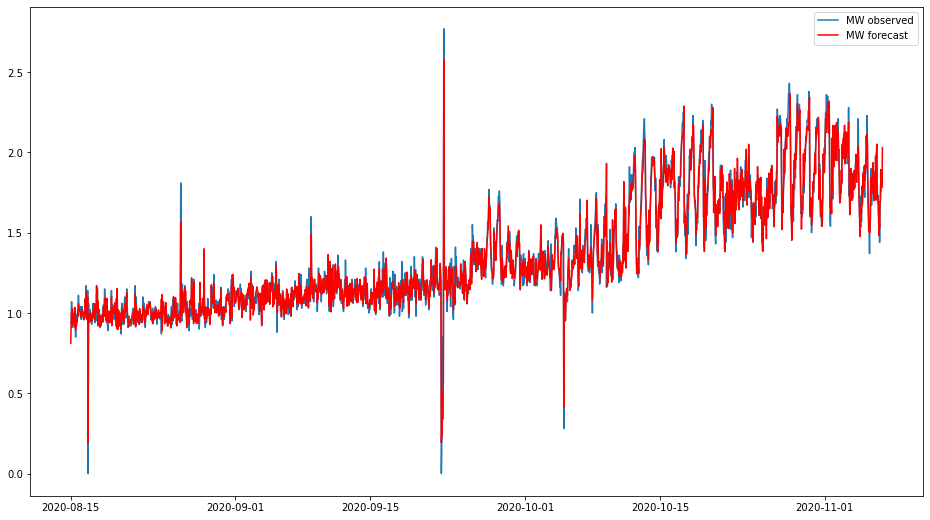

In [45]:
# evaluate generalization performance of SARIMAX model above (In-sample forecast)
obs=endog_train['MW']
pred=ts1_train['Forecast_SARIMAX']

# RMSE
rmse = sqrt(mean_squared_error(obs, pred))                                                # algo for RMSE
print('Test RMSE: %.3f' % rmse)

# MAPE - from 'https://vedexcel.com/how-to-calculate-mape-in-python/'
def mape(obs, pred):
    return np.mean(np.abs((obs - pred) / (obs)))*100                                      # algo for MAPE
result = mape(obs, pred)                                                  
print('Test MAPE: %.3f' % result)                            

#SMAPE - from  'https://vedexcel.com/how-to-calculate-smape-in-python/'
def smape(obs, pred):
    return 100/len(obs) * np.sum(2 * np.abs(pred - obs) / (np.abs(obs) + np.abs(pred)))   # algo for SMAPE

result = smape(obs,pred)
print('Test SMAPE: %.3f' % result)

# Pearson Correlation
corr = np.corrcoef(obs, pred)[0,1]
print('Correlation: %.3f' % corr)

# R2 
r2_result = corr**2                                                                       # algo for R-squared
print('R-squared: %.3f' % r2_result)


# plot forecasts against actual outcomes
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
plt.plot(obs, label = 'MW observed')
plt.plot(pred, color='red', label = 'MW forecast')
plt.legend()
plt.show()

In [10]:
# end

### TEST SET
###### performance model (forecast MW with exogenous m3/h instant flow hot water)

##### backtesting with train-test split method (from '2020-11-07' to '2020-11-09')
##### out-of-sample forecast on test set + performace¶

In [46]:
# Out-of-sample forecast        (baseline approach on test split as TRUE backtesting)
yhat_fore = fit_res.forecast(72, exog = exog_test)      # example of Out-of-sample forecast with exo on Test set
yhat_fore = pd.DataFrame(yhat_fore)
yhat_fore.index = df_base['2020-11-07':].index
yhat_fore

,predicted_mean
timestamp,
2020-11-07 00:00:00,1.846332
2020-11-07 01:00:00,1.966095
2020-11-07 02:00:00,1.961710
2020-11-07 03:00:00,2.000486
2020-11-07 04:00:00,2.081142
...,...
2020-11-09 19:00:00,1.768126
2020-11-09 20:00:00,1.769306
2020-11-09 21:00:00,1.787016


In [47]:
ts1_test['Forecast_SARIMAX']=yhat_fore         # appending forecast values to ts1 dataframe
ts1_test

<ipython-input-47-bd3f5c380a94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts1_test['Forecast_SARIMAX']=yhat_fore         # appending forecast values to ts1 dataframe


,m3_h_orig_orig,MW,Forecast_SARIMAX
timestamp,,,
2020-11-07 00:00:00,112.3,1.94,1.846332
2020-11-07 01:00:00,120.4,2.04,1.966095
2020-11-07 02:00:00,119.5,2.05,1.961710
2020-11-07 03:00:00,122.6,2.00,2.000486
2020-11-07 04:00:00,127.0,2.13,2.081142
...,...,...,...
2020-11-09 19:00:00,103.3,1.76,1.768126
2020-11-09 20:00:00,103.6,1.76,1.769306
2020-11-09 21:00:00,104.8,1.91,1.787016


Test RMSE: 0.146
Test MAPE: 5.745
Test SMAPE: 5.925
Correlation: 0.872
R-squared: 0.761


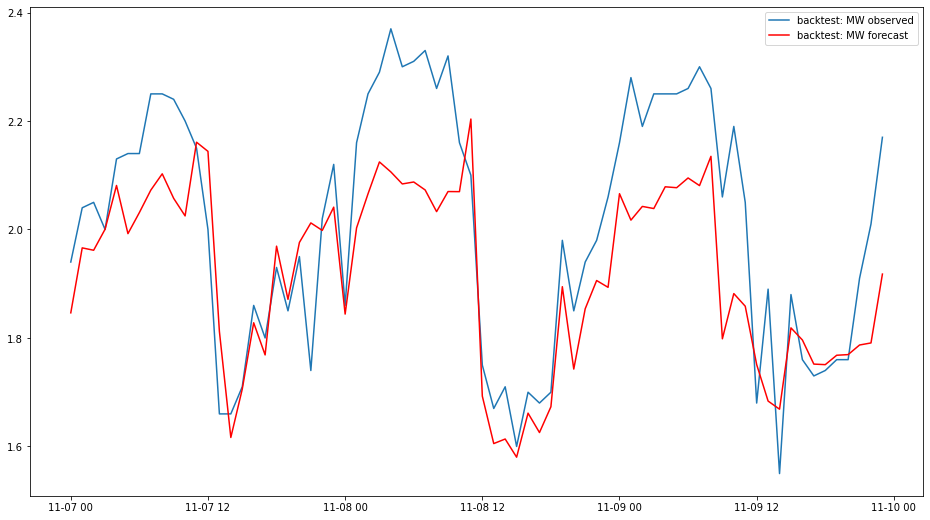

In [48]:
# evaluate generalization performance of SARIMAX model above (Out-of-sample forecast)
obs=endog_test['MW']
pred=ts1_test['Forecast_SARIMAX']

# RMSE
rmse = sqrt(mean_squared_error(obs, pred))                                                # algo for RMSE
print('Test RMSE: %.3f' % rmse)

# MAPE - from 'https://vedexcel.com/how-to-calculate-mape-in-python/'
def mape(obs, pred):
    return np.mean(np.abs((obs - pred) / (obs)))*100                                      # algo for MAPE
result = mape(obs, pred)                                                  
print('Test MAPE: %.3f' % result)                            

#SMAPE - from  'https://vedexcel.com/how-to-calculate-smape-in-python/'
def smape(obs, pred):
    return 100/len(obs) * np.sum(2 * np.abs(pred - obs) / (np.abs(obs) + np.abs(pred)))   # algo for SMAPE

result = smape(obs,pred)
print('Test SMAPE: %.3f' % result)

# Pearson Correlation
corr = np.corrcoef(obs, pred)[0,1]
print('Correlation: %.3f' % corr)

# R2 
r2_result = corr**2                                                                       # algo for R-squared
print('R-squared: %.3f' % r2_result)


# plot forecasts against actual outcomes
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
plt.plot(obs, label = 'backtest: MW observed')
plt.plot(pred, color='red', label = 'backtest: MW forecast')
plt.legend()
plt.show()

In [49]:
# end

### new plots for integrating train+test set

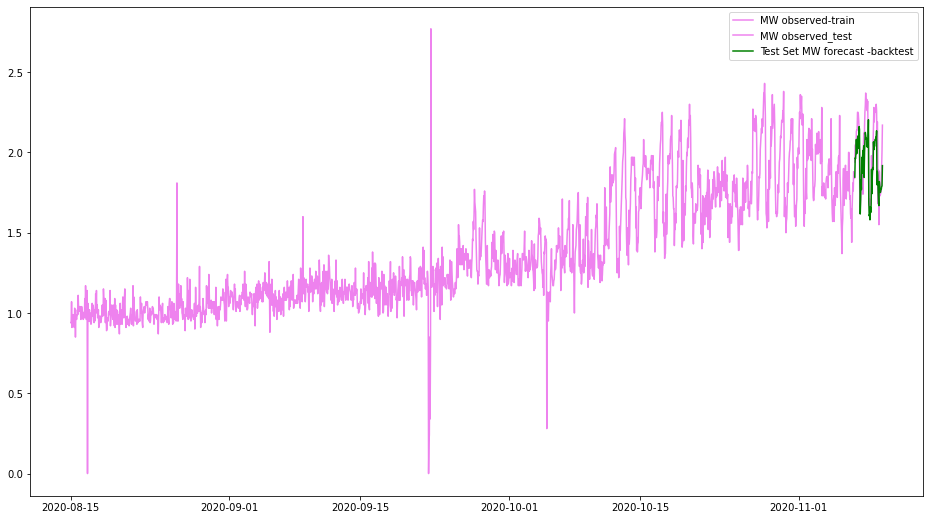

In [85]:
# evaluate generalization performance of SARIMAX model above (In-sample forecast)
obs=endog_train['MW']
obs_bktst=endog_test['MW']
pred=ts1_train['Forecast_SARIMAX']
forcst=ts1_test['Forecast_SARIMAX']

# plot forecasts against actual outcomes
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
plt.plot(obs, color='violet', label = 'MW observed-train')
plt.plot(obs_bktst, color='violet', label = 'MW observed_test')
# plt.plot(pred, color='red', label = 'Train Set MW forecast - model fit')
plt.plot(forcst, color='green', label = 'Test Set MW forecast -backtest')
plt.legend()
plt.show()

In [ ]:
# end